6
Время работы программы:  8.927164077758789


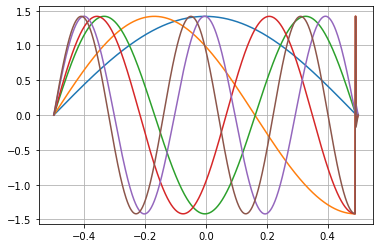

In [11]:
#shredinger 

import matplotlib.pyplot as plt 
import numpy as np 
import time 
# функция возвращает для заданной энергии величину f 
# вычисляемую в соответствии с  
# gamma - безразмерный коэф-т 
# E - энергия! 
# V - вектор, содержащий значения потенциала в узлах координатной сетки 
# Xmin - левая граница координатной сетки 
# Xmax - правая граница координатной сетки 
# Ngreed - число узлов координатной сеткци 
def Num(gamma, E, V, Xmin, Xmax, Ngreed): 
    dx = (Xmax-Xmin)/Ngreed 
    c = dx**2*gamma**2/12 
    Imatch = 0 
    # интегрирование уравнения Шредингера справа налево 
    psi = np.array([0, 9.99999*10**-10]) 
    Kim1 = c*(E-V[0]) 
    Ki = c*(E-V[1]) 
    for i in range(1, Ngreed-1): 
        Kip1 = c*(E-V[i+1]) 
        if ((Ki*Kip1 <= 0) and (Ki>0)): 
            Imatch = i 
            i = Ngreed-1
        if(i <= Ngreed-2): 
            # добавление в массив значение пси-функции 
            psi = np.append(psi, (psi[i]*(2-10*Ki)-psi[i-1]*(1+Kim1))/(1+Kip1)) 
            #print(psi[i+1]) 
            if (abs(psi[i+1]) >= 10**10): 
                for k in range(0,i+1):  
                    psi[k] = psi[k] * 9.99999 * 10 **(-6)
            Kim1 = Ki 
            Ki = Kip1
    if (Imatch == 0):
        Imatch = Ngreed-10 
    #Imatch верно вычисляется 
    # интегрирование уравнения Шредингера слева направа 
    psi_Left = psi[Imatch] 
    psi[Ngreed-1] = 0 
    psi[Ngreed-2] = 9.99999 * 10 **-10 
    Kip1 = c*(E-V[Ngreed-1]) 
    Ki = c*(E-V[Ngreed-2]) 
    for i in range(Ngreed-2, Imatch+2, -1): 
        Kim1 = c*(E-V[i-1]) 
        psi[i-1] = (psi[i]*(2-10*Ki)-psi[i+1]*(1+Kip1))/(1+Kim1) 
        if (abs(psi[i]) > 10**10): 
            for k in range(Ngreed-1, i, -1): 
                psi[k] = psi[k] * 9.99999* 10 ** -6 
        Kip1 = Ki 
        Ki = Kim1 
    if (psi_Left < 0): 
        for i in range(Imatch, Ngreed): 
            psi[i] = -psi[i] 
    # получаем
    psi1 = np.abs(psi) 
    Psimax = np.max(psi1) 
    f = (psi_Left + psi[Imatch] - (psi[Imatch-1]+psi[Imatch+1]))/Psimax 
    return [f, psi] 

# функция возвращает значения потенциала в узлах 
#координатной сетки 

def U(x, Xmin, Xmax): 
    if (Xmin <= x and x <= Xmax): 
        z = -1 
    else: 
        z = 10 ** 309 
    return z 

# функция возвращает собственные значения 
# и собственные функции уравнения Шредингера 
def Elevel(gamma, dE, V, Emax, Xmin, Xmax, Ngreed): 
    Tolf = 10 ** -6 
    Emin = -1 
    E = Emin + dE 
    m = 0
    Start = 0 
    EL = np.array([]) 
    while (E < Emax): 
        if (Start == 0): 
            E1 = E 
            [f, psi] = Num(gamma, E, V, Xmin, Xmax, Ngreed) 
            E = E + dE 
            F1 = f 
            Start = 1 
        E2 = E 
        [f, psi] = Num(gamma, E, V, Xmin, Xmax, Ngreed) 
        F2 = f 
        if (F1 * F2 > 0): 
            E1 = E 
            F1 = F2 
            E = E + dE 
        if (F1 * F2 < 0): 
            a = (E2-E1)/(F2-F1) 
            E = E1 - a*F1 
            [f, psi] = Num(gamma, E, V, Xmin, Xmax, Ngreed) 
            F1 = F2 
            E1 = E2 
            EL = np.append(EL,[m, E]) 
            #EL(m, 1) = m 
            #EL(m, 2) = E 
            if (m == 0): 
                Psi0 = psi.transpose() # операция транспонирования! 
            else: 
#                 print(psi)
                Psi0 = np.concatenate((Psi0, psi.transpose()), 0)# объединение ячеек массива 
            m = m+1 
            E = E+dE 
    EL.resize(int(EL.size/2), 2) 
    Psi0.resize(int(Psi0.size/Ngreed), Ngreed) 
    dx = (Xmax - Xmin) / (Ngreed-1) 
    N1 = Psi0.shape[0]  
    print(N1) 
    for i in range(0, N1): 
        S = Psi0[i,:]  
        S1 = S ** 2 
        Norm = 0 
        for j in range(0, Ngreed-1): 
            Norm = Norm + 0.5*(S1[j]+S1[j+1])*dx; 
        S = S/(Norm**0.5) # деление каждого элемента массива 
        if (i==0): 
            Psi = S 
        else: 
            Psi = np.concatenate((Psi, S), 0)
    Psi.resize(int(Psi.size/Ngreed), Ngreed) 
    #Psi = Psi.transpose() 
    return [EL, Psi] 
# программа!
np.set_printoptions(threshold=10) 
startTime = time.time() 
Xmin = -0.5 
Xmax = 0.5 
gamma = 20 
Ngreed = 1000 
dE = 10**-3 
Emax = -0 
x = [] 
for i in range(0, Ngreed): 
    x.append(Xmin+(Xmax-Xmin)/(Ngreed-1)*i) 
V = [] 
for i in range(0, Ngreed): 
    V.append(U(x[i], Xmin, Xmax)) 
[EL, Psi] = Elevel(gamma, dE, V, Emax, Xmin, Xmax, Ngreed) 
fig = plt.figure() 
for i in range(0, Psi.shape[0]): 
    plt.plot(x, Psi[i,:]) 
print("Время работы программы: ", (time.time() - startTime)) 
plt.grid(True) 
plt.show() 